<a href="https://colab.research.google.com/github/danielapavas/Optimizacion/blob/main/Metodo_de_bisecci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import sympy as sp

# **MÉTODO DE BISECCIÓN**




Raíz aproximada: 0.84716796875
Valor de la función en la raíz: 0.49292445182800293


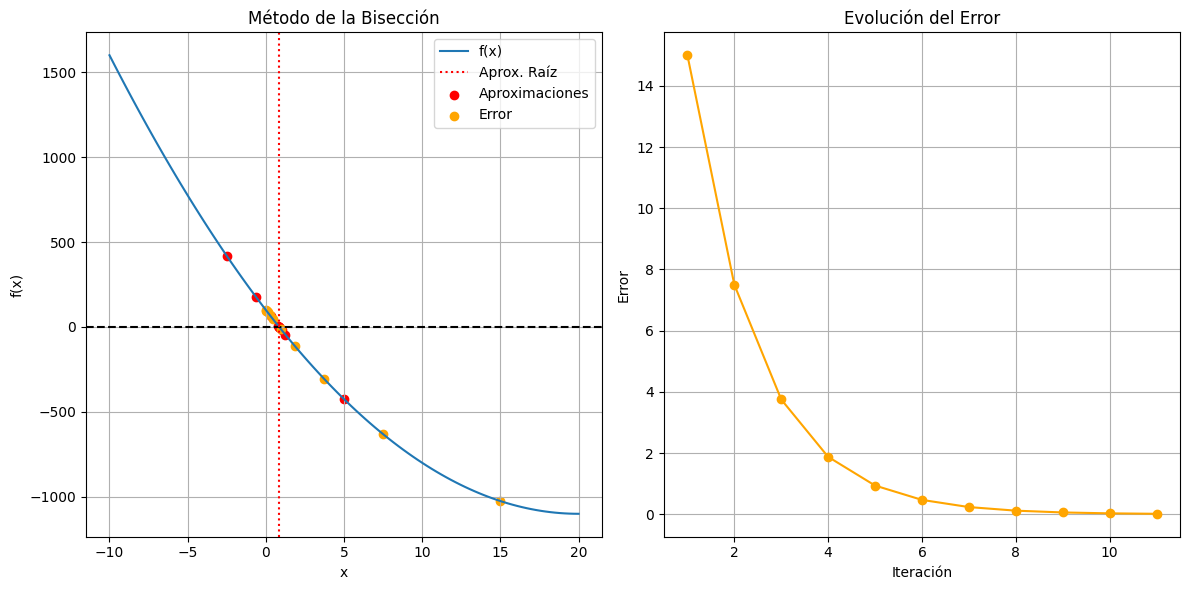


Tabla de datos:
    Iteración  Aproximación(xr)         xl         xu      Error
0           1          5.000000 -10.000000  20.000000  15.000000
1           2         -2.500000 -10.000000   5.000000   7.500000
2           3          1.250000  -2.500000   5.000000   3.750000
3           4         -0.625000  -2.500000   1.250000   1.875000
4           5          0.312500  -0.625000   1.250000   0.937500
5           6          0.781250   0.312500   1.250000   0.468750
6           7          1.015625   0.781250   1.250000   0.234375
7           8          0.898438   0.781250   1.015625   0.117188
8           9          0.839844   0.781250   0.898438   0.058594
9          10          0.869141   0.839844   0.898438   0.029297
10         11          0.854492   0.839844   0.869141   0.014648


In [62]:
def biseccion(funcion, xl, xu, tolerancia, maximo):
    if funcion(xl) * funcion(xu) >= 0:
        raise ValueError("La función no cumple con el teorema de Bolzano en el intervalo dado.")

    i = 0
    listaError = []
    listaAproximacion = []
    listaXL = []
    listaXU = []


    while (xu - xl)/2 > tolerancia and i < maximo:
        xr = (xl + xu) / 2
        listaAproximacion.append(xr)
        listaXL.append(xl)
        listaXU.append(xu)

        error = abs(xu - xl)/2
        listaError.append(error)
        i += 1

        if funcion(xl) * funcion(xr) == 0:
            return xr, listaAproximacion, listaError, listaXL, listaXU

        elif funcion(xl) * funcion(xr) < 0:
            xu = xr
        else:
            xl = xr



    return (xl + xu) / 2, listaAproximacion, listaError, listaXL, listaXU

#ejemplo
def ejemplo(x):
    return 3*x**2 - 120*x +100

xl = -10
xu = 20
tolerancia = 0.01
maximo = 100

root, listaAproximacion, listaError, listaXL, listaXU = biseccion(ejemplo, xl, xu, tolerancia, maximo)
valor_en_raiz = ejemplo(root) # Evaluar la función en la raíz aproximada
print("\nRaíz aproximada:", root)
print("Valor de la función en la raíz:", valor_en_raiz)

#Gráfica de la funcion
if listaAproximacion:
    x = np.linspace(xl, xu, 100)
    y = ejemplo(x)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(x, y, label='f(x)')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.axvline(x=root, color='red', linestyle=':', label='Aprox. Raíz')
    plt.scatter(listaAproximacion, [ejemplo(x) for x in listaAproximacion], color='red', label='Aproximaciones')
    plt.scatter(listaError, [ejemplo(x) for x in listaError], color='orange', label='Error')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.title('Método de la Bisección')

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(listaError) + 1), listaError, marker='o', color='orange', label='Error')
    plt.xlabel('Iteración')
    plt.ylabel('Error')
    plt.grid(True)
    plt.title('Evolución del Error')

    plt.tight_layout()

    plt.show()


  #Tabla de datos
if listaError:
    data = {
        "Iteración": list(range(1, len(listaAproximacion) + 1)),
        "Aproximación(xr)": listaAproximacion,
        "xl": listaXL,
        "xu": listaXU,
        "Error": listaError,
    }

    df = pd.DataFrame(data)

    print("\nTabla de datos:")
    print(df)


# **MÉTODO DE INTERPOLACIÓN CUADRÁTICA**


Valor máximo de f(x) = 1.77143091252755 en x = 1.4902527508500858


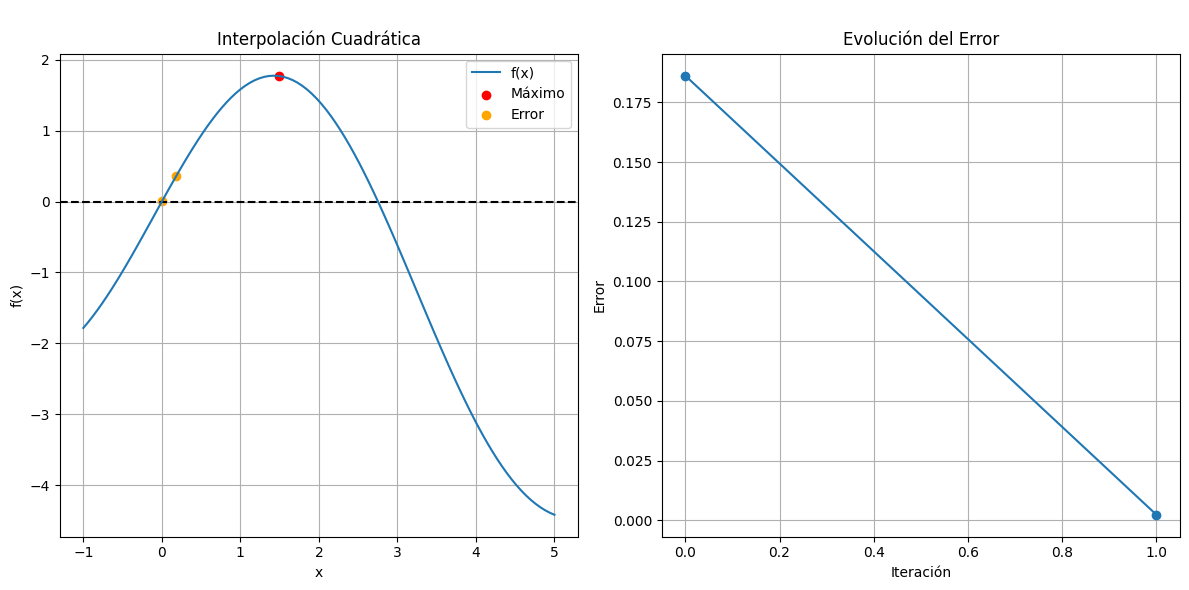


Tabla de datos :
   Iteración  x0       fx0        x1       fx1  x2       fx2        x3  \
0          1   0  0.000000  1.000000  1.582942   4 -3.113605  1.505535   
1          2   1  1.582942  1.505535  1.769079   4 -3.113605  1.490253   

        fx3     error  
0  1.769079  0.186137  
1  1.771431  0.002352  


In [64]:
def interpolacionCuadratica(f, x0, x1, x2, minimize=True, tol=0.01, maximo=100):
    history = []  # Almacenar datos para la tabla
    errores = []

    for i in range(maximo):
        fx0 = f(x0)
        fx1 = f(x1)
        fx2 = f(x2)

        # Calcular x3 mediante la fórmula dada
        x3 = (fx0 * (x1**2 - x2**2) + fx1 * (x2**2 - x0**2) + fx2 * (x0**2 - x1**2)) /(2 * fx0 * (x1 - x2) + 2 * fx1 * (x2 - x0) + 2 * fx2 * (x0 - x1))

        fx3 = f(x3)

        error = abs(fx3 - fx1)
        history.append((i + 1, x0, fx0, x1, fx1, x2, fx2, x3, fx3, error))
        errores.append(error)


        if fx3 >= fx1 and x3 > x1:
                x0 = x1
                x1 = x3

        elif fx3 > fx1 and x3 < x1 :
                x1 = x3
                x2 = x1

        elif fx3 < fx1 :
                x2 = x1
                x1 = x3


        if error < tol :
              break


    df = pd.DataFrame(history, columns=['Iteración', 'x0', 'fx0', 'x1', 'fx1', 'x2', 'fx2', 'x3', 'fx3', 'error'])

    return x1, f(x1), df, errores

def f(x):
    return 2 * np.sin(x) - x**2 / 10

x0 = 0
x1 = 1
x2 = 4

# Buscar máximo
max_x, max_valor, max_history, errores = interpolacionCuadratica(f, x0, x1, x2, minimize=False)

# Imprimir resultados
print("\nValor máximo de f(x) =", max_valor, "en x =", max_x)

# Generar gráficos
x_vals = np.linspace(-1, 5, 100)
y_vals = f(x_vals)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.plot(x_vals, y_vals, label='f(x)')
plt.scatter([max_x], [max_valor], color='red', label='Máximo')
plt.scatter(errores, [f(x) for x in errores], color='orange', label='Error')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('\nInterpolación Cuadrática')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(len(errores)), errores, marker='o', linestyle='-')
plt.title('Evolución del Error')
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.grid(True)

plt.tight_layout()
plt.show()


# Tabla de datos
#Tabla de datos para el máximo
print("\nTabla de datos :")
print(max_history)


# **MÉTODO DE LA SECCIÓN DORADA MÁXIMO**

Máximo aproximado en x: 1.4326691025103049
Valor máximo: 1.7756971093311618


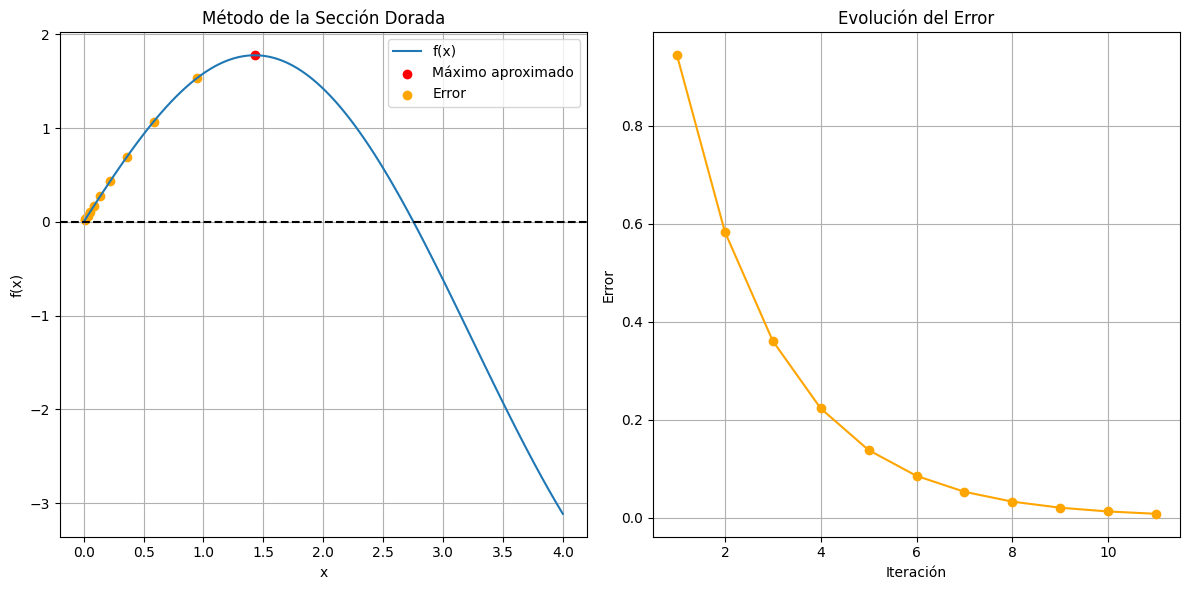


Tabla de datos:
    Iteración        xl        xu        x1        x2  Máximo aprox     Error
0           1  0.000000  2.472136  2.472136  1.527864      1.236068  0.944272
1           2  0.944272  2.472136  1.527864  0.944272      1.708204  0.583592
2           3  0.944272  1.888544  1.888544  1.527864      1.416408  0.360680
3           4  1.304952  1.888544  1.527864  1.304952      1.596748  0.222912
4           5  1.304952  1.665631  1.665631  1.527864      1.485292  0.137767
5           6  1.304952  1.527864  1.527864  1.442719      1.416408  0.085145
6           7  1.390097  1.527864  1.442719  1.390097      1.458980  0.052622
7           8  1.390097  1.475242  1.475242  1.442719      1.432669  0.032522
8           9  1.390097  1.442719  1.442719  1.422619      1.416408  0.020100
9          10  1.410197  1.442719  1.422619  1.410197      1.426458  0.012422
10         11  1.422619  1.442719  1.430297  1.422619      1.432669  0.007678


In [102]:
def seccionDorada(funcion, xl, xu, tolerancia, maximo):
    phi = (1 + (np.sqrt(5))) / 2  # Valor de la razón áurea

    listaError = []
    valores_xl = []
    valores_xu = []
    valores_x1 = []
    valores_x2 = []
    valores_maXimo_X = []
    valores_funcion = []

    def f(x):
        return funcion(x)

    for i in range(maximo):
        d = (phi - 1) * (xu - xl)
        x1 = xl + d
        x2 = xu - d

        if f(x2) > f(x1):  #Para hallar el minimo intercambiamos
            xu = x1
        else:
            xl = x2



        error = abs(x1 - x2)
        listaError.append(error)
        valores_xl.append(xl)
        valores_xu.append(xu)
        valores_x1.append(x1)
        valores_x2.append(x2)
        maXimo_X = (xl + xu) / 2
        valores_maXimo_X.append(maXimo_X)
        valores_funcion.append(f(maXimo_X))

        if error < tolerancia:
            break

    maximoValor = f(maXimo_X)

    return maXimo_X, maximoValor, listaError, valores_xl, valores_xu, valores_x1, valores_x2, valores_maXimo_X, valores_funcion

# Función de ejemplo
def f(x):
    return 2 * np.sin(x) - (x ** 2) / 10

xl = 0
xu = 4
tolerancia = 0.01
maximo = 100

maXimo_X, maximoValor, listaError, valores_xl, valores_xu, valores_x1, valores_x2, valores_maXimo_X, valores_funcion = seccionDorada(f, xl, xu, tolerancia, maximo)

print("Máximo aproximado en x:", maXimo_X)
print("Valor máximo:", maximoValor)

# Crear gráfica
x_valor = np.linspace(xl, xu, 100)
y_valor = f(x_valor)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_valor, y_valor, label='f(x)')
plt.scatter(maXimo_X, maximoValor, color='red', label='Máximo aproximado')
plt.scatter(listaError, [f(x) for x in listaError], color='orange', label='Error')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.title('Método de la Sección Dorada')


plt.subplot(1, 2, 2)
plt.plot(range(1, len(listaError) + 1), listaError, marker='o', color='orange', label='Error')
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.grid(True)
plt.title('Evolución del Error')

plt.tight_layout()

plt.show()

# Crear tabla de datos
data = {
    'Iteración': [i+1 for i in range(len(valores_xl))],
    'xl': valores_xl,
    'xu': valores_xu,
    'x1': valores_x1,
    'x2': valores_x2,
    'Máximo aprox': valores_maXimo_X,
    'Error': listaError
}

df = pd.DataFrame(data)
print("\nTabla de datos:")
print(df)

# **MÉTODO DE LA SECCIÓN DORADA MÍNIMO**


Mínimo aproximado en x: 3.989950002518717
Valor mínimo: -3.092360642291262


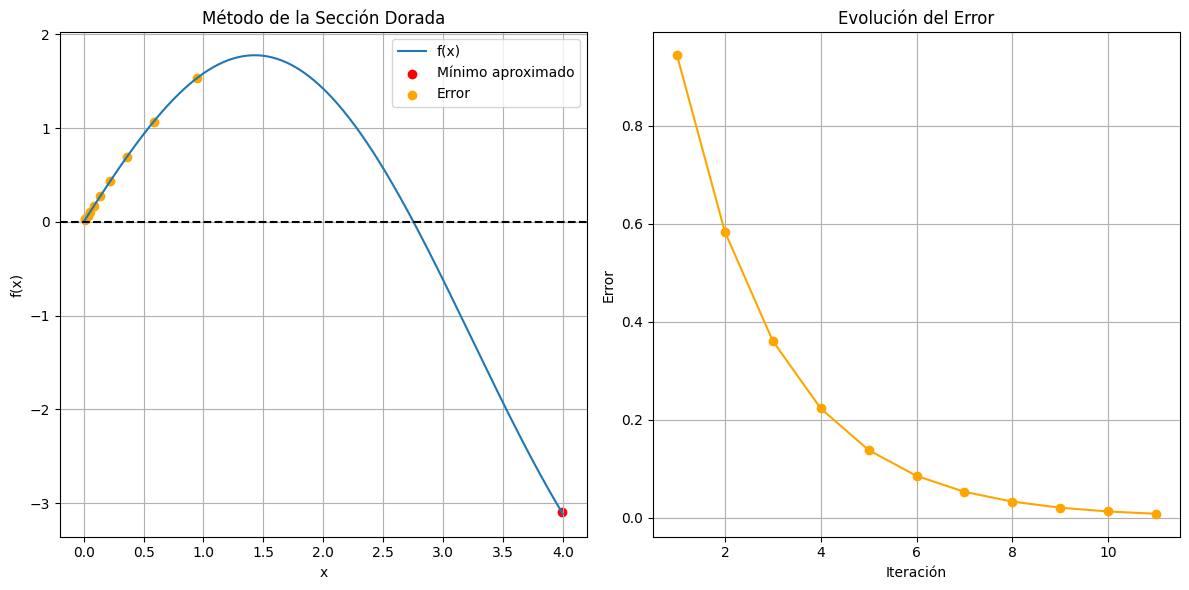


Tabla de datos:
    Iteración        xl  xu        x1        x2  Minimo aprox     Error
0           1  1.527864   4  2.472136  1.527864      2.763932  0.944272
1           2  2.472136   4  3.055728  2.472136      3.236068  0.583592
2           3  3.055728   4  3.416408  3.055728      3.527864  0.360680
3           4  3.416408   4  3.639320  3.416408      3.708204  0.222912
4           5  3.639320   4  3.777088  3.639320      3.819660  0.137767
5           6  3.777088   4  3.862233  3.777088      3.888544  0.085145
6           7  3.862233   4  3.914855  3.862233      3.931116  0.052622
7           8  3.914855   4  3.947378  3.914855      3.957428  0.032522
8           9  3.947378   4  3.967478  3.947378      3.973689  0.020100
9          10  3.967478   4  3.979900  3.967478      3.983739  0.012422
10         11  3.979900   4  3.987578  3.979900      3.989950  0.007678


In [103]:
def seccionDorada(funcion, xl, xu, tolerancia, maximo):
    phi = (1 + (np.sqrt(5))) / 2  # Valor de la razón áurea

    listaError = []
    valores_xl = []
    valores_xu = []
    valores_x1 = []
    valores_x2 = []
    valores_minimo_X = []
    valores_funcion = []

    def f(x):
        return funcion(x)

    for i in range(maximo):
        d = (phi - 1) * (xu - xl)
        x1 = xl + d
        x2 = xu - d

        if f(x1) < f(x2):  #Para hallar el minimo intercambiamos
            xl = x2
        else:
            xu = x1



        error = abs(x1 - x2)
        listaError.append(error)
        valores_xl.append(xl)
        valores_xu.append(xu)
        valores_x1.append(x1)
        valores_x2.append(x2)
        minimo_X = (xl + xu) / 2
        valores_minimo_X.append(minimo_X)
        valores_funcion.append(f(minimo_X))

        if error < tolerancia:
            break

    minimoValor = f(minimo_X)

    return minimo_X, minimoValor, listaError, valores_xl, valores_xu, valores_x1, valores_x2, valores_minimo_X, valores_funcion

# Función de ejemplo
def f(x):
    return 2 * np.sin(x) - (x ** 2) / 10

xl = 0
xu = 4
tolerancia = 0.01
maximo = 100

minimo_X, minimoValor, listaError, valores_xl, valores_xu, valores_x1, valores_x2, valores_minimo_X, valores_funcion = seccionDorada(f, xl, xu, tolerancia, maximo)

print("Mínimo aproximado en x:", minimo_X)
print("Valor mínimo:", minimoValor)

# Crear gráfica
x_valor = np.linspace(xl, xu, 400)
y_valor = f(x_valor)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_valor, y_valor, label='f(x)')
plt.scatter(minimo_X, minimoValor, color='red', label='Mínimo aproximado')
plt.scatter(listaError, [f(x) for x in listaError], color='orange', label='Error')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.title('Método de la Sección Dorada')


plt.subplot(1, 2, 2)
plt.plot(range(1, len(listaError) + 1), listaError, marker='o', color='orange', label='Error')
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.grid(True)
plt.title('Evolución del Error')

plt.tight_layout()

plt.show()

# Crear tabla de datos
data = {
    'Iteración': [i+1 for i in range(len(valores_xl))],
    'xl': valores_xl,
    'xu': valores_xu,
    'x1': valores_x1,
    'x2': valores_x2,
    'Minimo aprox': valores_minimo_X,
    'Error': listaError
}

df = pd.DataFrame(data)
print("\nTabla de datos:")
print(df)

# **MÉTODO DE FALSA POSICIÓN**

La raíz de la funcion es: 0.8524373274937841
Valor de la función en la raíz: -0.11253110733986205


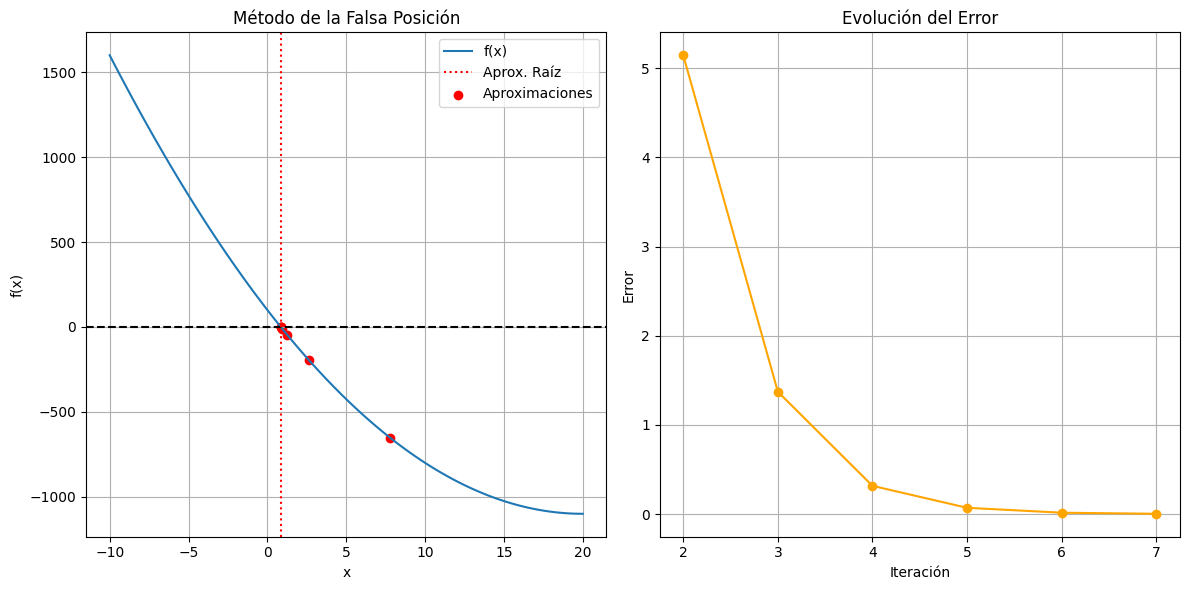


Tabla de datos:
   Iteración  Valor de xl  Valor de xu  Aproximación (xr)     Error
0          1          -10    20.000000           7.777778       inf
1          2          -10     7.777778           2.631579  5.146199
2          3          -10     2.631579           1.259259  1.372320
3          4          -10     1.259259           0.942249  0.317010
4          5          -10     0.942249           0.871541  0.070709
5          6          -10     0.871541           0.855894  0.015647
6          7          -10     0.855894           0.852437  0.003456


In [59]:
def falsa_posicion(f,xl, xu, tol, max_iter):

    aproximaciones = []
    errores = []
    valores_xl = []
    valores_xu = []
    xr_previo = None

    for i in range(max_iter):
        fxl = f(xl)
        fxu = f(xu)
        xr = xu - (fxu *( xl- xu))/ (fxl - fxu)


        aproximaciones.append(xr)
        valores_xl.append(xl)
        valores_xu.append(xu)


        error = abs(xr_previo- xr) if xr_previo is not None else float('inf')
        errores.append(error)


        if error < tol:
            return xr,aproximaciones, errores, valores_xl, valores_xu


        if fxl * f(xr) < 0:
            xu = xr
            xr_previo=xr
        else:
            xl = xr


    return None, aproximaciones, errores, valores_xl, valores_xu


def f(x):
    return 3*x**2 - 120*x + 100

xl = -10
xu = 20
tolerancia = 0.01
max_iteraciones = 100

# Ejecutar el método de la falsa posición
raiz, aproximaciones, errores, valores_xl, valores_xu = falsa_posicion(f,xl, xu, tolerancia, max_iteraciones)

valor_en_raiz = f(raiz)
if raiz is not None:
    print("La raíz de la funcion es:", raiz)
    print("Valor de la función en la raíz:", valor_en_raiz)

else:
    print("El método no convergió")

# rango de valores x para la gráfica de la función
x = np.linspace(xl, xu, 100)
y = f(x)

# Gráfica de la función
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y, label='f(x)')
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=raiz, color='red', linestyle=':', label='Aprox. Raíz')
plt.scatter(aproximaciones, [f(x) for x in aproximaciones], color ='red', label='Aproximaciones')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Método de la Falsa Posición')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(errores) + 1), errores, marker='o', color='orange', label='Error')
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.grid(True)
plt.title('Evolución del Error')

plt.tight_layout()

plt.show()

if errores:
    data = {
        "Iteración": list(range(1, len(aproximaciones) + 1)),
        "Valor de xl": valores_xl,
        "Valor de xu": valores_xu,
        "Aproximación (xr)": aproximaciones,
        "Error": errores
    }

df = pd.DataFrame(data)

print("\nTabla de datos:")
print(df)


# **MÉTODO DE NEWTON RAPHSON PARA RAÍZ**


Raíz aproximada: 0.8514578389085125
Valor de la función en la raíz: 6.852947649349517e-07


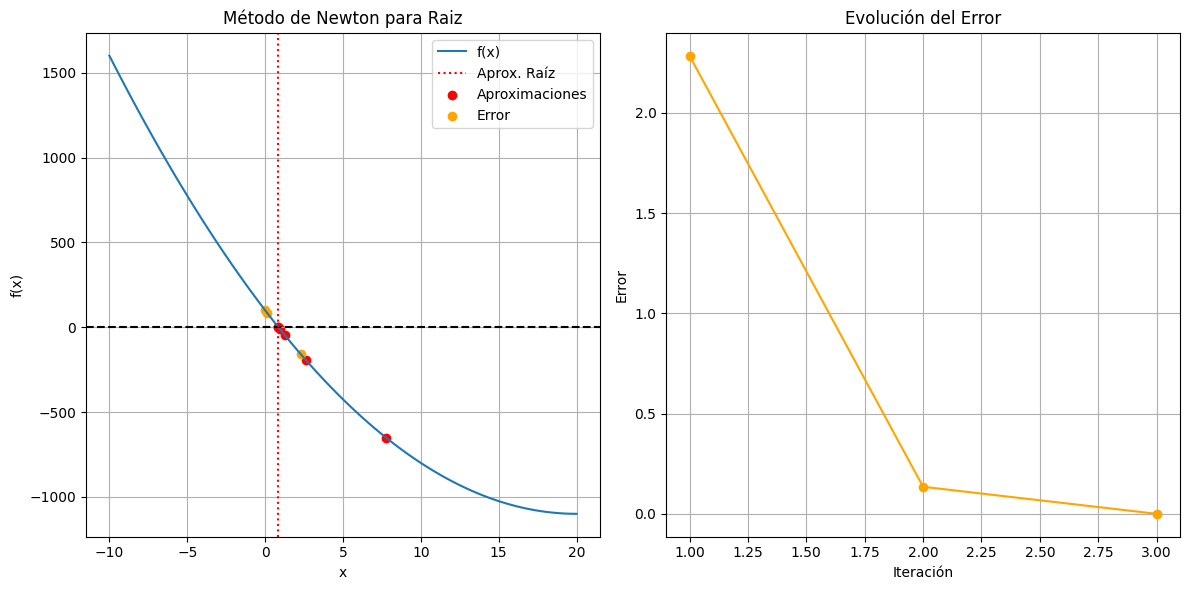


Tabla de datos:
   Iteración  Aproximación     Error         x        f(x)       df(x)
0          1      0.715686  2.284314  3.000000 -233.000000 -102.000000
1          2      0.850980  0.135294  0.715686   15.654268 -115.705882
2          3      0.851458  0.000478  0.850980    0.054913 -114.894121


In [78]:
def newton_raphson(f, df, x0, tol, maximo):
    x = x0
    i = 0
    errores = []
    approximaciones = []
    x_valor = []
    fx_valor = []
    dfx_valor = []

    while i < maximo:
        x_next = x - f(x) / df(x)
        error = abs(x_next - x)
        errores.append(error)
        approximaciones.append(x_next)
        x_valor.append(x)
        fx_valor.append(f(x))
        dfx_valor.append(df(x))

        if error < tol:
            break

        x = x_next
        i += 1

    return x_next, errores, approximaciones, x_valor, fx_valor, dfx_valor

def f(x):
    return 3*x**2 - 120*x +100

x_sym = sp.Symbol('x')
df = sp.diff(f(x_sym), x_sym)
df_lambda = sp.lambdify(x_sym, df, 'numpy')


raiz, errores, approximaciones, x_valor, fx_valor, dfx_valor = newton_raphson(f, df_lambda, x0=3, tol=0.01, maximo=100)

valor_en_raiz = f(raiz)
print("\nRaíz aproximada:", raiz)
print("Valor de la función en la raíz:", valor_en_raiz)

if aproximaciones:
    x = np.linspace(-10, 20, 100)
    y = f(x)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(x, y, label='f(x)')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.axvline(x=raiz, color='red', linestyle=':', label='Aprox. Raíz')
    plt.scatter(aproximaciones, [f(x) for x in aproximaciones], color='red', label='Aproximaciones')
    plt.scatter(errores, [f(x) for x in errores], color='orange', label='Error')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.title('Método de Newton para Raiz')

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(errores) + 1), errores, marker='o', color='orange', label='Error')
    plt.xlabel('Iteración')
    plt.ylabel('Error')
    plt.grid(True)
    plt.title('Evolución del Error')

    plt.tight_layout()

    plt.show()

if aproximaciones:
    data = {
      'Iteración': list(range(1, len(errores) +1)),
      'Aproximación': approximaciones,
      'Error': errores,
      'x': x_values,
      'f(x)': fx_values,
      'df(x)': dfx_values
    }

    df = pd.DataFrame(data)

    print("\nTabla de datos:")
    print(df)




# **MÉTODO DE NEWTON RAPHSON PARA MÁXIMOS**





Máximo aproximado: 1.4275517793013137
Valor de la función en el máximo: 1.77572565314742


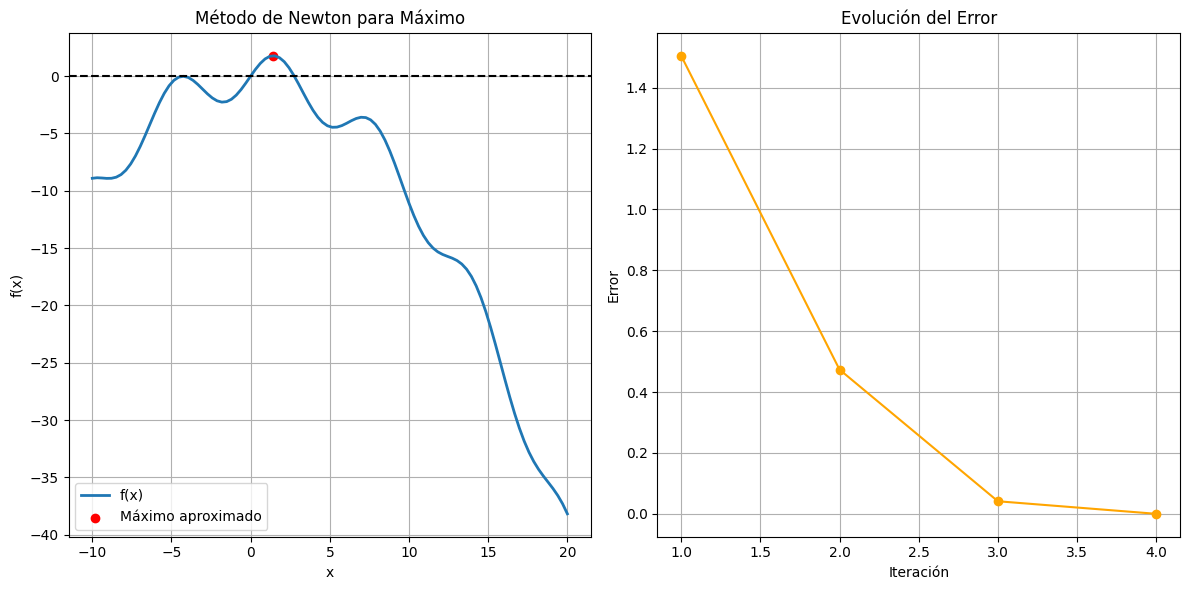


Tabla de datos:
   Iteración  Aproximación (x_next)         x               f(x)     df(x)  \
0          1               0.995082  2.500000  0.571944288207913 -2.102287   
1          2               1.469011  0.995082   1.57858800724688  0.889853   
2          3               1.427642  1.469011   1.77384937931422 -0.090582   
3          4               1.427552  1.427642   1.77572564421365 -0.000197   

     d2f(x)     Error  
0 -1.396944  1.504918  
1 -1.877607  0.473929  
2 -2.189649  0.041368  
3 -2.179542  0.000091  


In [40]:
def newtonRaphson(f, df, d2f, x0, tol, maximo):
    x = x0
    i = 0
    errores = []
    aproximaciones = []
    x_values = []
    fx_values = []
    df_values = []
    d2f_values = []

    while i < maximo:
        x_next = x - df(x) / d2f(x)
        error = abs(x_next - x)
        errores.append(error)
        aproximaciones.append(x_next)
        x_values.append(x)
        fx_values.append(f(x))
        df_values.append(df(x))
        d2f_values.append(d2f(x))

        if error < tol:
            break

        x = x_next
        i += 1

    return x_next, errores, aproximaciones, x_values, fx_values, df_values, d2f_values

# función y sus derivadas
x_sym = sp.Symbol('x')
def f(x):
    return 2 * sp.sin(x) - x**2 / 10

df = sp.diff(f(x_sym), x_sym)
d2f = sp.diff(df, x_sym)

# Convertir las derivadas en funciones lambda
df_lambda = sp.lambdify(x_sym, df, 'numpy')
d2f_lambda = sp.lambdify(x_sym, d2f, 'numpy')

valor_maximo, errores, aproximaciones, x_values, fx_values, df_values, d2f_values = newtonRaphson(f, df_lambda, d2f_lambda, x0=2.5, tol=0.01, maximo=100)

valorFuncion = f (valor_maximo)
print("\nMáximo aproximado:", valor_maximo)
print("Valor de la función en el máximo:", valorFuncion)


# Graficar la función
x = np.linspace(-10, 20, 100)
y = [f(val) for val in x]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y, label='f(x)', linewidth=2)
plt.axhline(y=0, color='black', linestyle='--')
plt.scatter(valor_maximo, valorFuncion, color='red', label='Máximo aproximado')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.title('Método de Newton para Máximo')

plt.tight_layout()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(errores) + 1), errores, marker='o', color='orange', label='Error')
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.grid(True)
plt.title('Evolución del Error')

plt.tight_layout()

plt.show()

# Tabla de datos
data = {
    'Iteración': list(range(1, len(aproximaciones) + 1)),
    'Aproximación (x_next)': aproximaciones,
    'x': x_values,
    'f(x)': fx_values,
    'df(x)': df_values,
    'd2f(x)': d2f_values,
    'Error': errores,
}

df = pd.DataFrame(data)

print("\nTabla de datos:")
print(df)



# **MÉTODO DE BÚSQUEDA ALEATORIA**

El valor máximo de fn es: 0.8130777184127478
Se obtiene cuando x = -0.8226511265615049 y y = 1.9594161214201646

Tabla de datos: 
   Iteración  Aproximación         X         Y    Función
0          1     -8.208910  1.234992  1.377761  -8.208910
1          2     -7.904578  1.240710  1.292464  -7.904578
2          3     -0.156105 -0.085961  1.341367  -0.156105
3          4     -0.156105  0.671769  2.539152  -8.893901
4          5     -0.156105  1.038710  2.341264 -11.200582
5          6     -0.156105  0.229927  2.810694  -6.717474
6          7     -0.156105  1.608792  2.281761 -17.051641
7          8     -0.156105  0.851338  2.310182  -9.261142
8          9     -0.156105  1.374479  1.988319 -12.583762
9         10      0.813078 -0.822651  1.959416   0.813078


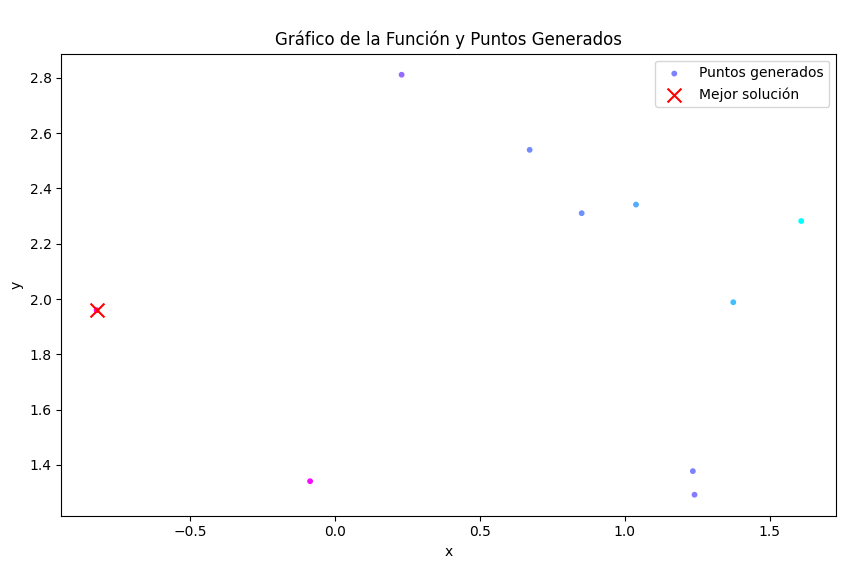

In [ ]:
def busquedaAleatoria(n=10):
    maxf = -1E9
    valor_x = []
    valor_y = []
    valor_fn = []
    aproximacion = []

    for j in range(n):
        x = -2 + 4 * random.random()
        y = 1 + 2 * random.random()
        fn = y - x - 2 * x**2 - 2 * x * y - y**2
        if fn > maxf:
            maxf = fn
            maxx = x
            maxy = y
        valor_x.append(x)
        valor_y.append(y)
        valor_fn.append(fn)
        aproximacion.append(maxf)

    print("El valor máximo de fn es:", maxf)
    print("Se obtiene cuando x =", maxx, "y y =", maxy)

    # Crear una malla de puntos para la función
    x_rango = np.linspace(-2, 2, 400)
    y_rango = np.linspace(1, 3, 400)
    X, Y = np.meshgrid(x_rango, y_rango)
    Z = Y - X - 2 * X**2 - 2 * X * Y - Y**2

    # Crear un DataFrame con los datos
    data = {
        'Iteración': range(1, n + 1),
        'Aproximación': aproximacion,
        'X': valor_x,
        'Y': valor_y,
        'Función': valor_fn
    }
    df = pd.DataFrame(data)
    print("\nTabla de datos: ")
    print(df)

    # Graficar la función y los puntos
    plt.figure(figsize=(10, 6))

    plt.scatter(valor_x, valor_y, c=valor_fn, cmap='cool', marker='o', s=10, label='Puntos generados')
    plt.scatter(maxx, maxy, c='red', marker='x', s=100, label='Mejor solución')
    plt.title('\nGráfico de la Función y Puntos Generados')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Llamar a la función para encontrar el máximo
busquedaAleatoria()
